# Table of Contents
 <p><div class="lev2 toc-item"><a href="#Exploring-weight-variables-and-their-correlation" data-toc-modified-id="Exploring-weight-variables-and-their-correlation-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Exploring weight variables and their correlation</a></div><div class="lev1 toc-item"><a href="#distribution-of-weight-by-gagedays" data-toc-modified-id="distribution-of-weight-by-gagedays-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>distribution of weight by gagedays</a></div><div class="lev1 toc-item"><a href="#Difference-between-WTKG-and-WTKG.estimated" data-toc-modified-id="Difference-between-WTKG-and-WTKG.estimated-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Difference between WTKG and WTKG.estimated</a></div>

## Exploring weight variables and their correlation



In [7]:
#library(ggbiplot)
library(tidyverse, quiet=T)

library(caret, quiet=T)

dat0 <- read.csv("../datasets/Ultrasound/training_ultrasound.csv")

# Use Hadlok equation to estimate fetal weight from the 4 key ultrasound measurements
dat.raw = dat0 %>%
    mutate(
        LOG10.FWT.GM = 1.3596 + 0.0064*HCIRCM + 0.0424*ABCIRCM + 0.174*FEMURCM + 0.00061*BPDCM*ABCIRCM - 0.00386*ABCIRCM*FEMURCM,
        WTKG.estimate = ifelse(AGEDAYS<1 ,(10^LOG10.FWT.GM)/1000 ,WTKG) ,
        Study = paste('Study', STUDYID)
        )

dat = dat.raw %>% group_by(SUBJID) %>%
    mutate(tot.measurements = n()) %>%
    filter(tot.measurements >1)

In [8]:
dat.raw %>% 
    glimpse

Observations: 17,370
Variables: 37
$ STUDYID       <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...
$ SUBJID        <int> 1002, 1002, 1002, 1003, 1003, 1003, 1003, 1003, 1003,...
$ SEXN          <int> 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...
$ SEX           <fctr> Female, Female, Female, Male, Male, Male, Male, Male...
$ GAGEBRTH      <int> 276, 276, 276, 280, 280, 280, 280, 280, 280, 280, 280...
$ BIRTHWT       <int> 3540, 3540, 3540, 3100, 3100, 3100, 3100, 3100, 3100,...
$ BIRTHLEN      <dbl> 50.3, 50.3, 50.3, 50.3, 50.3, 50.3, 50.3, 50.3, 50.3,...
$ BIRTHHC       <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N...
$ DELIVERY      <fctr> Category 2.0, Category 2.0, Category 2.0, Category 2...
$ PARITY        <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...
$ GRAVIDA       <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...
$ GAGEDAYS      <int> 255, 277, 669, 223, 224, 263, 266, 281, 321, 463, 645...
$ AGEDAYS       <

# distribution of weight by gagedays

GAGEDAYS,WTKG,BIRTHWT,BWT_40,WTKG.estimate
232,2.05,2.05,3.478905,2.05
235,1.91,1.91,3.226769,1.91
239,2.63,2.63,3.783895,2.63
240,1.47,1.47,2.515915,1.47
242,2.03,2.03,3.039378,2.03
244,2.42,2.42,3.379851,2.42


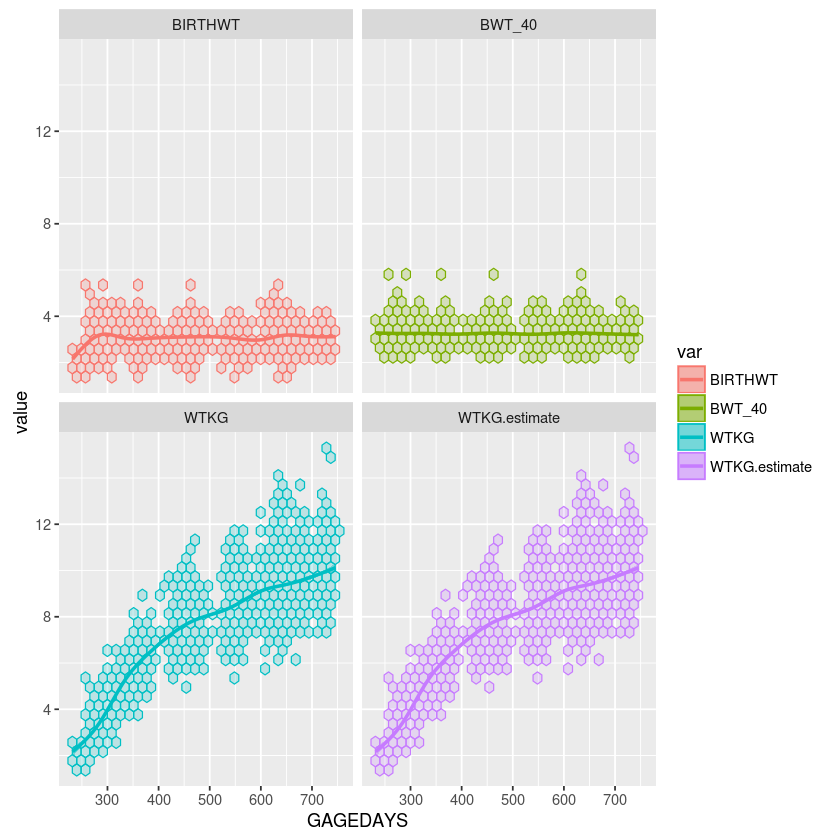

In [34]:
dat.weights = dat %>% 
    ungroup %>%
    select(GAGEDAYS, WTKG, BIRTHWT, BWT_40, WTKG.estimate) %>% 
    mutate(BIRTHWT=BIRTHWT/1000) %>%
    arrange(GAGEDAYS) %>%
    filter(complete.cases(.)) 

dat.weights %>% head

dat.weights %>% 
    arrange(GAGEDAYS) %>%
    gather(var, value, -GAGEDAYS) %>%
       ggplot(aes(x=GAGEDAYS, y=value, fill=var, color=var)) + 
        geom_smooth() + 
        geom_hex(alpha=0.2) + facet_wrap(~var)

# Difference between WTKG and WTKG.estimated 

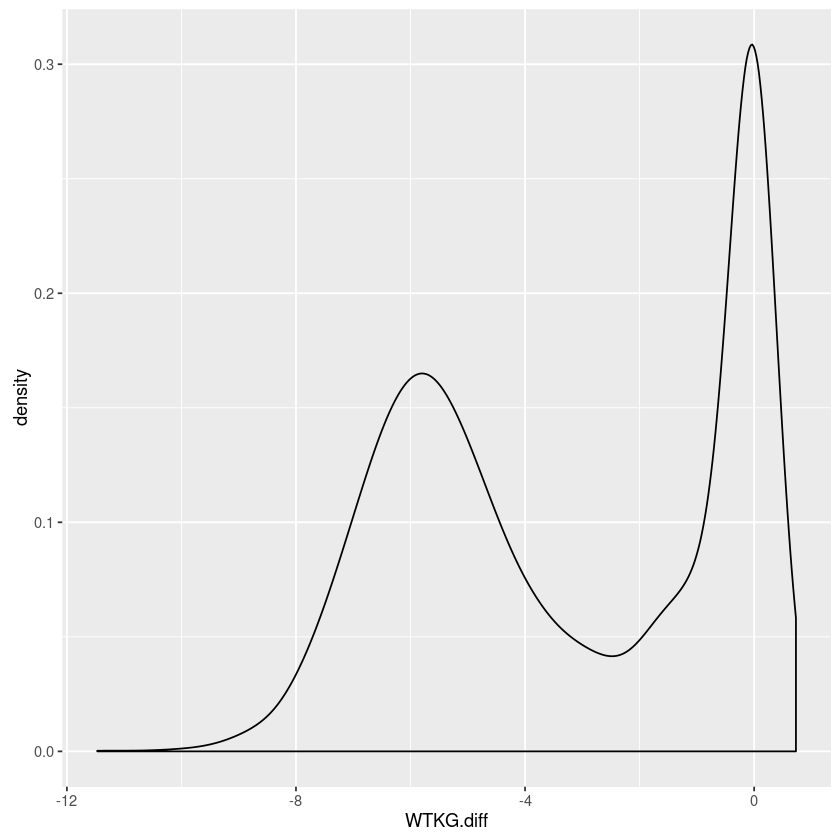

In [37]:

dat.weights %>% mutate (WTKG.diff = BIRTHWT - WTKG.estimate) %>%
    ggplot(aes(x=WTKG.diff)) +
        geom_density()